# **Лабораторна робота №4**
# **МІТ-31**
# **Ковальський Олександр**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

#1. Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).

Create, read, update, delete

In [ ]:
tf1 = tf.constant([[1, 2], [3, 4]])
tf1 = tf1 + 100
tf1_without_2nd_row = tf.gather(tf1, [0])
tf1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[101, 102],
       [103, 104]], dtype=int32)>

In [ ]:
scalar = tf.constant(10)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
scalar.ndim

0

In [ ]:
vector = tf.constant([19, 11.2])
vector

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([19. , 11.2], dtype=float32)>

In [ ]:
vector.ndim

1

In [ ]:
mat1 = tf.constant([[1, 2],
                    [3, 4]])
mat1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
mat1.ndim

2

In [ ]:
mat2 = tf.constant([[1., 4.],
                    [3., 2.],
                    [5., 6.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 4.],
       [3., 2.],
       [5., 6.]], dtype=float16)>

In [ ]:
mat2.ndim

2

In [ ]:
tensor = tf.constant([[[1, 2, 3,],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
random_1 = tf.random.Generator.from_seed(7)
random_1 = random_1.normal(shape=(4, 2))
random_2 = tf.random.Generator.from_seed(10)
random_2 = random_2.normal(shape=(5, 3))

In [ ]:
df2 = pd.DataFrame(np.random.randint(0, 10, (5, 5)), columns=["a", "b", "c", "d", "e"])
print(df2)
print(df2.describe(include='all'))

   a  b  c  d  e
0  1  2  9  9  7
1  5  9  9  6  2
2  7  4  5  5  9
3  4  9  7  8  3
4  0  7  4  4  6
              a         b         c         d         e
count  5.000000  5.000000  5.000000  5.000000  5.000000
mean   3.400000  6.200000  6.800000  6.400000  5.400000
std    2.880972  3.114482  2.280351  2.073644  2.880972
min    0.000000  2.000000  4.000000  4.000000  2.000000
25%    1.000000  4.000000  5.000000  5.000000  3.000000
50%    4.000000  7.000000  7.000000  6.000000  6.000000
75%    5.000000  9.000000  9.000000  8.000000  7.000000
max    7.000000  9.000000  9.000000  9.000000  9.000000


In [ ]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'column1': np.random.rand(10),
        'column2': np.random.rand(10),
        'column3': np.random.rand(10),
        'target': np.random.randint(0, 3, 10)
    }
)
features = ['column1', 'column2', 'column3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

    column1   column2   column3  target
0  0.862137  0.512989  0.874630       0
1  0.272932  0.148033  0.930313       1
2  0.682449  0.927108  0.900087       0
3  0.222806  0.190967  0.633460       1
4  0.439379  0.782700  0.261451       1
5  0.806236  0.829773  0.631168       1
6  0.933198  0.389226  0.330104       1
7  0.620187  0.324449  0.300732       1
8  0.609853  0.942778  0.199093       2
9  0.030779  0.751533  0.186828       1
features:[0.86213714 0.51298887 0.8746304 ] target:0
features:[0.27293232 0.14803256 0.9303129 ] target:1
features:[0.68244916 0.9271083  0.9000865 ] target:0
features:[0.22280619 0.19096734 0.6334603 ] target:1
features:[0.43937907 0.7826999  0.2614512 ] target:1
features:[0.8062358  0.82977295 0.63116765] target:1
features:[0.93319803 0.3892258  0.33010364] target:1
features:[0.62018687 0.32444897 0.3007317 ] target:1
features:[0.60985255 0.9427778  0.19909282] target:2
features:[0.03077901 0.75153315 0.18682763] target:1


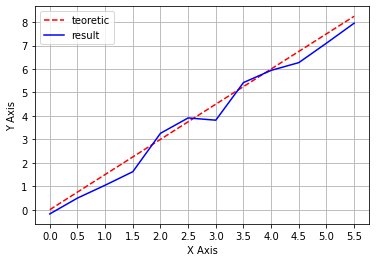

In [ ]:
x = np.arange(0, 6, 0.5)
y1 = x * 1.5

adder = np.random.random(len(x)) * 1.4 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.plot(x, y1, "r--", label="teoretic")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.33548556371108856
0.14735700716231995


In [ ]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('data.csv', 'w') as f:
    f.write(df.to_csv(index=False))

      X         Y  Y_hat
0   0.0 -0.179931   0.00
1   0.5  0.495552   0.75
2   1.0  1.044412   1.50
3   1.5  1.619654   2.25
4   2.0  3.257600   3.00
5   2.5  3.913206   3.75
6   3.0  3.816938   4.50
7   3.5  5.422073   5.25
8   4.0  5.941455   6.00
9   4.5  6.272539   6.75
10  5.0  7.102334   7.50
11  5.5  7.954099   8.25


#2. Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=80, verbose=0)

In [ ]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_1.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

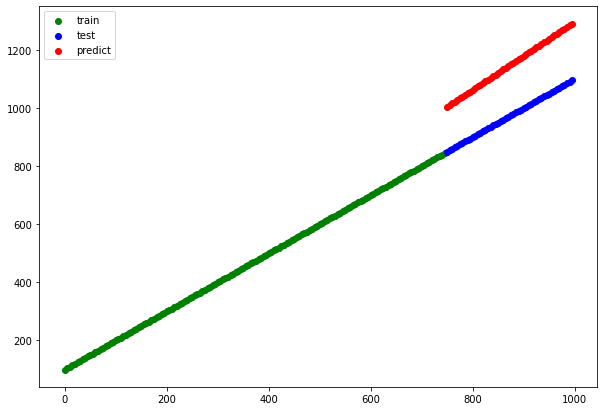

In [ ]:
y_reg_preds = model_1.predict(y_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='g', label='train')
plt.scatter(X_reg_test, y_reg_test, c='b', label='test')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='predict')
plt.legend()

In [ ]:
model_1.evaluate(x, y1)

1/1 [==============================] - 0s 94ms/step - loss: 7.7470 - mae: 7.7470


[7.747018337249756, 7.747018337249756]

In [ ]:
len(x)

12

In [ ]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

((12,), (0,))

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1/1 [==============================] - 0s 452ms/step - loss: 3.9688 - accuracy: 0.0833
Epoch 2/25
1/1 [==============================] - 0s 13ms/step - loss: 3.6169 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 6ms/step - loss: 3.2767 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 8ms/step - loss: 2.9482 - accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 4ms/step - loss: 2.6314 - accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 6ms/step - loss: 2.3264 - accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 2.0332 - accuracy: 0.0000e+00
Epoch 8/25
1/1 [==============================] - 0s 5ms/step - loss: 1.7521 - accuracy: 0.0000e+00
Epoch 9/25
1/1 [==============================] - 0s 4ms/step - loss: 1.4826 - accuracy: 0.0000e+00
Epoch 10/25
1/1 [==============================] - 0s 4ms/step - loss: 1.2246 - accuracy: 0.0000e+00
Epoch 11/25

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,3.968758,0.083333
1,3.616942,0.000000
2,3.276713,0.000000
3,2.948177,0.000000
4,2.631409,0.000000
5,2.326434,0.000000
6,2.033239,0.000000
7,1.752090,0.000000
8,1.482598,0.000000
9,1.224565,0.000000


Text(0.5, 1.0, 'Model_2 training curves')

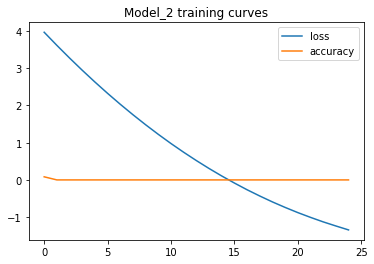

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")

In [ ]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 253ms/step - loss: 2.5573 - mae: 2.5573
Epoch 2/80
1/1 [==============================] - 0s 8ms/step - loss: 2.4741 - mae: 2.4741
Epoch 3/80
1/1 [==============================] - 0s 8ms/step - loss: 2.3915 - mae: 2.3915
Epoch 4/80
1/1 [==============================] - 0s 6ms/step - loss: 2.3089 - mae: 2.3089
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 2.2264 - mae: 2.2264
Epoch 6/80
1/1 [==============================] - 0s 7ms/step - loss: 2.1438 - mae: 2.1438
Epoch 7/80
1/1 [==============================] - 0s 9ms/step - loss: 2.0612 - mae: 2.0612
Epoch 8/80
1/1 [==============================] - 0s 8ms/step - loss: 1.9787 - mae: 1.9787
Epoch 9/80
1/1 [==============================] - 0s 4ms/step - loss: 1.8961 - mae: 1.8961
Epoch 10/80
1/1 [==============================] - 0s 5ms/step - loss: 1.8135 - mae: 1.8135
Epoch 11/80
1/1 [==============================] - 0s 5ms/step - loss: 1.7309 - mae: 1.

In [ ]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(12, 0)

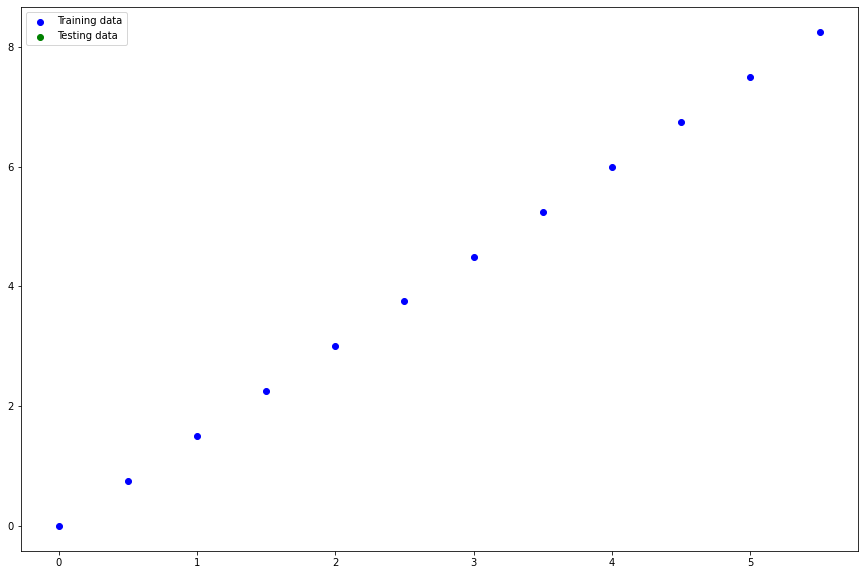

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [ ]:
model.predict([20.0])

array([[29.533686]], dtype=float32)

#4. Відповіді оформити .ipynb документом
#5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними